# Setup

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

# Overlap analysis

## String similarity

### Analyses of similarity data (data created in t-analysis-similarityMatrix.ipynb)

In [4]:
similToPlot = pd.read_pickle('../workproduct-files/valuableMilestones/FullSimilarityComparison_run1.pkl')
similToPlot2 = pd.read_pickle('../workproduct-files/similarityMatrix/FullSimilarityComparison.pkl')

In [5]:
%%time
bins = pd.cut(similToPlot['similarityRatio'], bins = np.linspace(0.8, 1, 21))
binsToPlot = bins.value_counts().sort_index()

bins2 = pd.cut(similToPlot2['similarityRatio'], bins = np.linspace(0.8, 1, 21))
binsToPlot2 = bins2.value_counts().sort_index()

Wall time: 34.2 ms


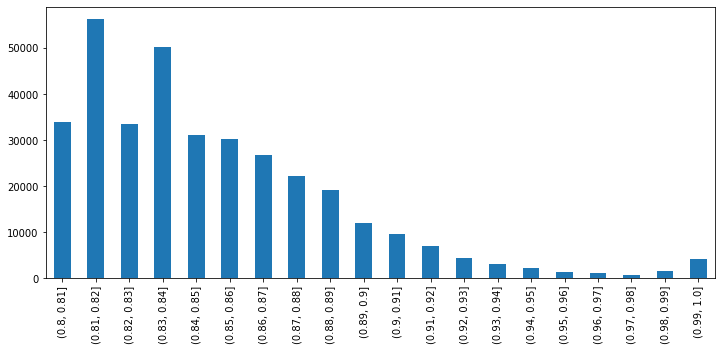

In [6]:
binsToPlot.plot.bar()

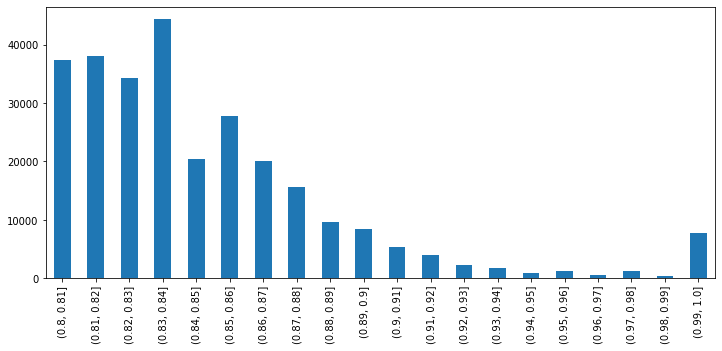

In [7]:
binsToPlot2.plot.bar()

In [8]:
print(binsToPlot)

(0.8, 0.81]     33909
(0.81, 0.82]    56131
(0.82, 0.83]    33418
(0.83, 0.84]    50211
(0.84, 0.85]    31162
(0.85, 0.86]    30297
(0.86, 0.87]    26685
(0.87, 0.88]    22162
(0.88, 0.89]    19133
(0.89, 0.9]     11929
(0.9, 0.91]      9673
(0.91, 0.92]     7072
(0.92, 0.93]     4500
(0.93, 0.94]     3125
(0.94, 0.95]     2173
(0.95, 0.96]     1330
(0.96, 0.97]     1077
(0.97, 0.98]      792
(0.98, 0.99]     1482
(0.99, 1.0]      4288
Name: similarityRatio, dtype: int64


In [9]:
print(binsToPlot2)

(0.8, 0.81]     37357
(0.81, 0.82]    38080
(0.82, 0.83]    34371
(0.83, 0.84]    44322
(0.84, 0.85]    20500
(0.85, 0.86]    27855
(0.86, 0.87]    20116
(0.87, 0.88]    15622
(0.88, 0.89]     9607
(0.89, 0.9]      8380
(0.9, 0.91]      5285
(0.91, 0.92]     4025
(0.92, 0.93]     2311
(0.93, 0.94]     1686
(0.94, 0.95]      940
(0.95, 0.96]     1188
(0.96, 0.97]      506
(0.97, 0.98]     1199
(0.98, 0.99]      355
(0.99, 1.0]      7706
Name: similarityRatio, dtype: int64


In [18]:
print(len(similToPlot.loc[similToPlot['similarityRatio'] == 1]))
print(len(similToPlot2.loc[similToPlot2['similarityRatio'] == 1]))

4086
7680


In [33]:
dataSetOverlap1 = similToPlot.loc[similToPlot['similarityRatio'] == 1 , 'i-id'].apply(lambda x: x.split('_')[0]) + '_' + similToPlot['j-id'].apply(lambda x: x.split('_')[0])
dataSetOverlap2 = similToPlot2.loc[similToPlot2['similarityRatio'] == 1 , 'i-id'].apply(lambda x: x.split('_')[0]) + '_' + similToPlot2['j-id'].apply(lambda x: x.split('_')[0])

In [34]:
print(sum(dataSetOverlap1.value_counts()))
print(dataSetOverlap1.value_counts())
print('\n')
print(sum(dataSetOverlap2.value_counts()))
print(dataSetOverlap2.value_counts())

4086
rtg_tdb         1486
rtg_rtg         1328
tdb_tdb         1189
opentdb_tdb       35
rtg_opentdb       27
rtg_tfyi          12
tfyi_tdb           6
tfyi_opentdb       2
tfyi_tfyi          1
dtype: int64


7680
tdb_tdb            3329
rtg_tdb            2849
rtg_rtg            1364
opentdb_tdb          80
rtg_opentdb          30
rtg_tfyi             17
tfyi_tdb              7
tfyi_opentdb          2
tfyi_tfyi             1
opentdb_opentdb       1
dtype: int64


In [12]:
# dfStyler = similToPlotSorted.reset_index(drop = True).style.set_properties(**{'text-align': 'left'})
# dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
# dfStyler

In [37]:
# %%time
similToPlot2.iloc[7670:8100]

,i,j,similarityRatio,i-id,j-id,i-question,j-question
7670,31698,1855,1.000000,tdb_0x007bd2,tdb_0x00073f,What is Calvados?,What Is Calvados?
7671,67401,63470,1.000000,rtg_0x00427f,rtg_0x003324,What English party was politician Arthur Hayday associated with?,What English party was politician Arthur Hayday associated with?
7672,31654,1842,1.000000,tdb_0x007ba6,tdb_0x000732,What is another name for the star fruit?,What is another name for the star fruit?
7673,31660,1843,1.000000,tdb_0x007bac,tdb_0x000733,What is armagnac?,What is Armagnac?
7674,32460,3760,1.000000,tdb_0x007ecc,tdb_0x000eb0,What is the Capital of: Thailand?,What is the capital of Thailand?
7675,60935,56595,1.000000,rtg_0x00293d,rtg_0x001849,Which fruit is affected by a grey type of fungus known commonly as Noble Rot?,Which fruit is affected by a grey type of fungus known commonly as Noble Rot?
7676,61102,32464,1.000000,rtg_0x0029e4,tdb_0x007ed0,What is the capital of Tunisia?,What is the Capital of: Tunisia?
7677,35800,5495,1.000000,tdb_0x008bd8,tdb_0x001577,What shakespearean king was actually king of scotland for 17 years?,What Shakespearean king was actually king of Scotland for 17 years?
7678,32314,3484,1.000000,tdb_0x007e3a,tdb_0x000d9c,What is the Capital of: Djibouti?,What is the capital of Djibouti?
7679,60988,30975,1.000000,rtg_0x002972,tdb_0x0078ff,What is a brickfielder?,What is a brickfielder?
